# Chapter 3 Exercises (Hyndman and Athanasopoulos)

In [2]:
import pandas as pd # data wrangling
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import boxcox

## Exercise 1

Consider the GDP information in global_economy.

Plot the GDP per capita for each country over time. Which country has the highest GDP per capita?

In [3]:
# read in the data from R generated csv file
df_global_economy = pd.read_csv("data/global_economy.csv", 
                                parse_dates=["Year"], 
                                index_col=["Year"])

df_global_economy["GDP_Per_Capita"] = (df_global_economy["GDP"] / 
df_global_economy["Population"]).round(2)

# calculate gdp per capita
df_gdp_per_capita = df_global_economy[["Country", "GDP_Per_Capita","GDP", "Population"]]

#group by country
df_grouped = df_gdp_per_capita.groupby("Country")



##### Which country has the highest GDP per capita?

In [4]:
# sort vales of GDP per Capita by Country
df_gdp_per_capita.groupby("Country")[["GDP_Per_Capita", "GDP", "Population"]]\
  .max()\
    .reset_index()\
      .sort_values("GDP_Per_Capita", ascending=False)\
        .head(10)

,Country,GDP_Per_Capita,GDP,Population
163,Monaco,185152.53,7.060236e+09,38695.0
139,Liechtenstein,179308.08,6.657171e+09,37922.0
144,Luxembourg,119225.38,6.632734e+10,599449.0
180,Norway,103059.25,5.235021e+11,5282223.0
145,"Macao SAR, China",94004.39,5.534800e+10,622567.0
22,Bermuda,93605.75,6.109928e+09,65636.0
202,San Marino,90682.58,2.752307e+09,33400.0
114,Isle of Man,89941.64,7.428280e+09,84287.0
197,Qatar,88564.82,2.062247e+11,2639211.0
232,Switzerland,88415.63,7.091826e+11,8466017.0


The country with the highest GDP per Capita is Monaca. It is a city-state that borders the Mediterranean Sea. Moreover, looking at the table we can infer that rich countries with very small population have higher GDP per Capita which makes sense.

##### How has this changed over time?

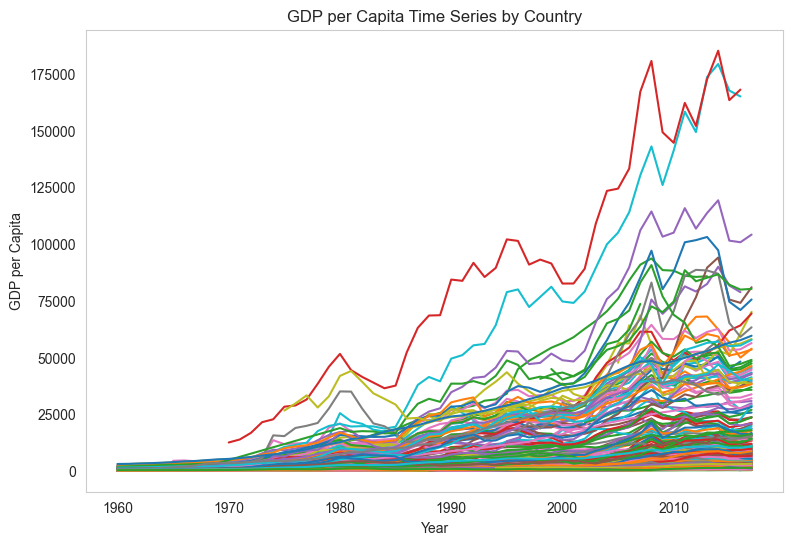

In [5]:
# plot the time series
plt.figure(figsize=(9,6))

sns.set_style("whitegrid")

# create lines for each country
for country, value in df_grouped:
    sns.lineplot(x=value.index, 
                 y = "GDP_Per_Capita", 
                 data=value, label = None)

# add labels
plt.title('GDP per Capita Time Series by Country')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.grid()
plt.show()

## Exercise 2

For each of the following series, make a graph of the data. If transforming seems appropriate, do so and describe the effect.

##### United States GDP from global_economy.

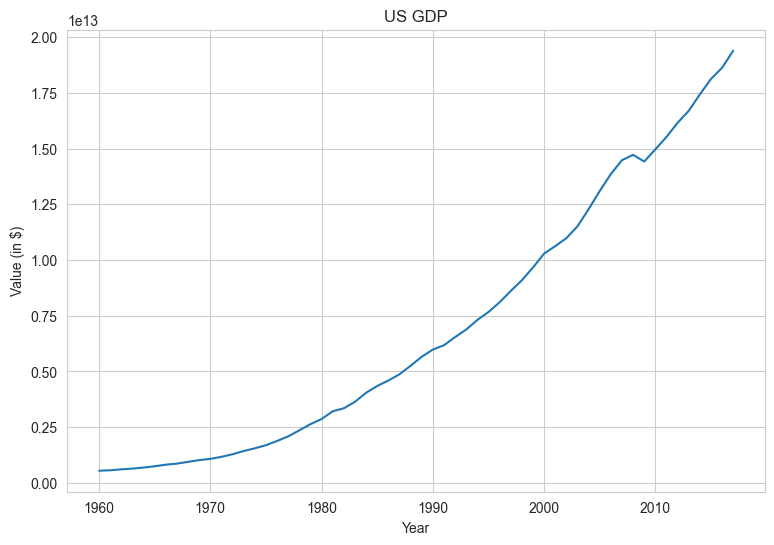

In [6]:
# filter USA from the rest of the data
df_us_gdp = df_global_economy[df_global_economy["Country"] == "United States"]

#plot
plt.figure(figsize=(9,6))

sns.lineplot(x=df_us_gdp.index, 
             y = df_us_gdp.GDP)

# edit labels
plt.xlabel("Year")
plt.ylabel("Value (in $)")
plt.title("US GDP")

plt.show()

##### Slaughter of Victorian “Bulls, bullocks and steers” in aus_livestock.

In [7]:
# read in data
df_aus_livestock = pd.read_csv("aus_livestock.csv", 
                               parse_dates=["Month"], 
                               index_col=['Month'])

# filter animal in animals
df_filtered_livestock = df_aus_livestock[df_aus_livestock["Animal"] == \
  "Bulls, bullocks and steers"]

df_filtered_livestock = df_filtered_livestock[["Count"]]

C:\Users\nickc\AppData\Local\Temp\ipykernel_39796\547698856.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_aus_livestock = pd.read_csv("aus_livestock.csv",


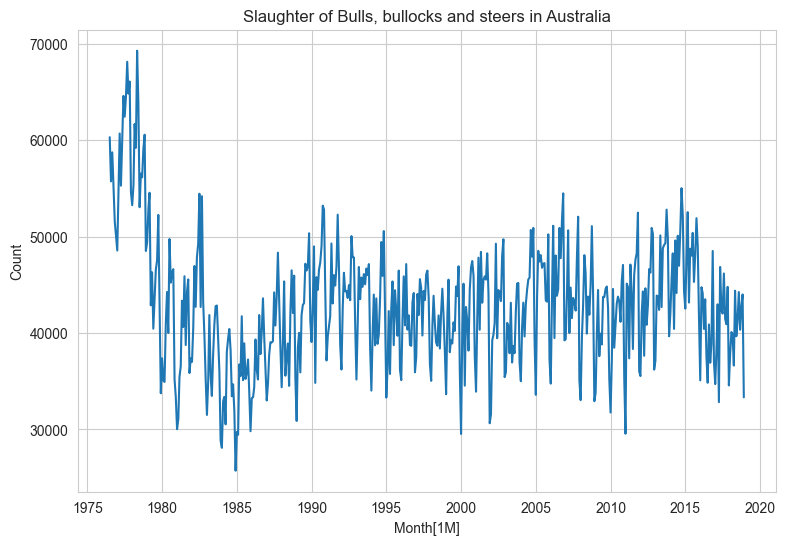

In [8]:
plt.figure(figsize=(9,6))

sns.lineplot(x = df_filtered_livestock.index, 
             y = df_filtered_livestock["Count"],
             errorbar=None)

plt.xlabel("Month[1M]")
plt.ylabel("Count")
plt.title("Slaughter of Bulls, bullocks and steers in Australia")

plt.show()

Looking the plot, we can see that the variation of the data is all over place. To combat the we must imploy transformations in order to mitigate the variability of the data.

Let us try a log tranform on the data and determine whether it is able to reduce the variability on the data.


In [9]:
# apply log transform
df_filtered_livestock["log_Count"] = np.log(df_filtered_livestock["Count"] + 0.001)

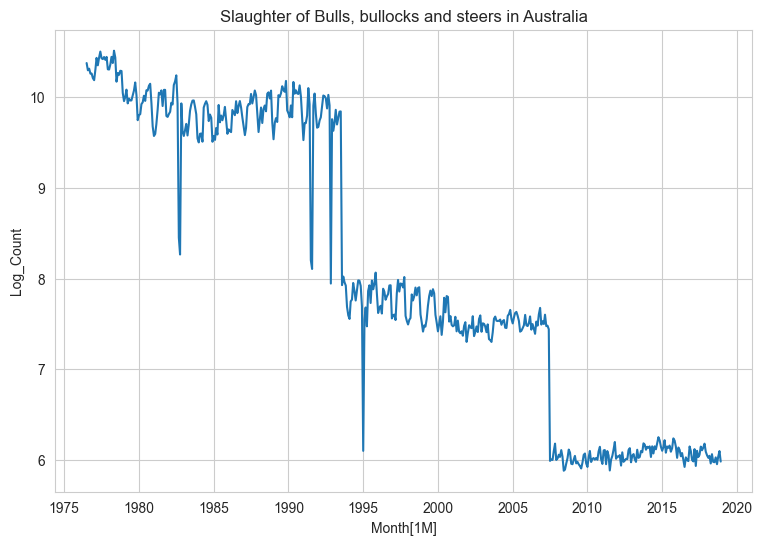

In [10]:
plt.figure(figsize=(9,6))

sns.lineplot(x = df_filtered_livestock.index, 
             y = df_filtered_livestock["log_Count"],
             errorbar=None)

plt.xlabel("Month[1M]")
plt.ylabel("Log_Count")
plt.title("Slaughter of Bulls, bullocks and steers in Australia")

plt.show()

Log transform did not quite create homogenous time series. Let's try some other transformation

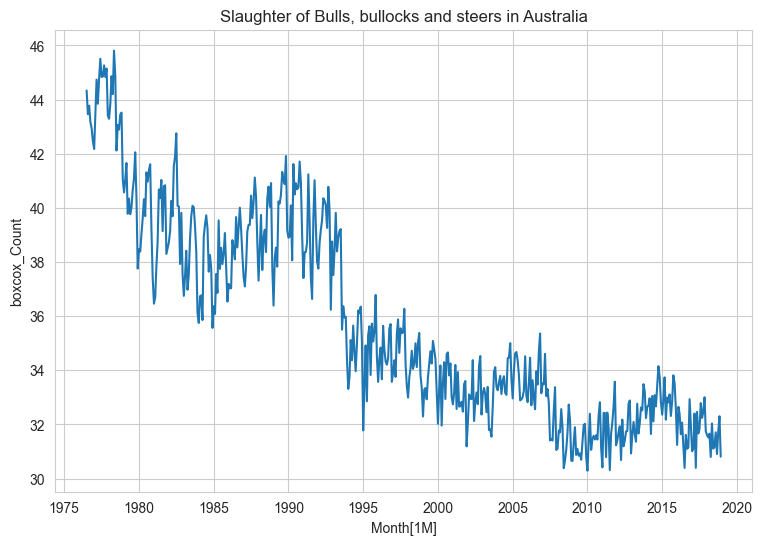

In [11]:
df_filtered_livestock["boxcox_Count"], lambda_val = boxcox(df_filtered_livestock["Count"] + 0.001)

plt.figure(figsize=(9,6))

sns.lineplot(x = df_filtered_livestock.index, 
             y = df_filtered_livestock["boxcox_Count"], 
             errorbar=None)

plt.xlabel("Month[1M]")
plt.ylabel("boxcox_Count")
plt.title("Slaughter of Bulls, bullocks and steers in Australia")

plt.show()

##### Victorian Electricity Demand from vic_elec

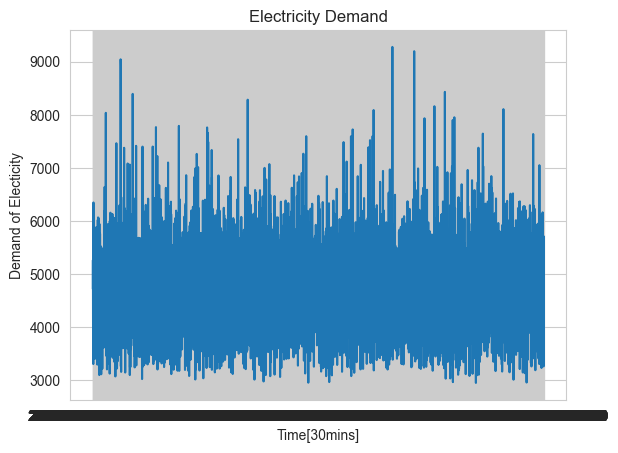

In [12]:
df_vic_elec = pd.read_csv("vic_elec.csv", parse_dates=["Time"], index_col = ["Time"])
df_demand = df_vic_elec[["Demand"]]

sample_df = df_demand.sample(n=5000)

plt.plot(sample_df.index, sample_df["Demand"])

plt.xlabel("Time[30mins]")
plt.ylabel("Demand of Electicity")
plt.title("Electricity Demand")

plt.show()

##### Gas production from aus_production.

In [13]:
df_aus_prod = pd.read_csv("aus_production.csv", parse_dates=["Quarter"], index_col=['Quarter'])
df_aus_prod.head()

C:\Users\nickc\AppData\Local\Temp\ipykernel_39796\776626471.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_aus_prod = pd.read_csv("aus_production.csv", parse_dates=["Quarter"], index_col=['Quarter'])


,Unnamed: 0,Beer,Tobacco,Bricks,Cement,Electricity,Gas
Quarter,,,,,,,
1956 Q1,1,284,5225.0,189.0,465,3923,5
1956 Q2,2,213,5178.0,204.0,532,4436,6
1956 Q3,3,227,5297.0,208.0,561,4806,7
1956 Q4,4,308,5681.0,197.0,570,4418,6
1957 Q1,5,262,5577.0,187.0,529,4339,5


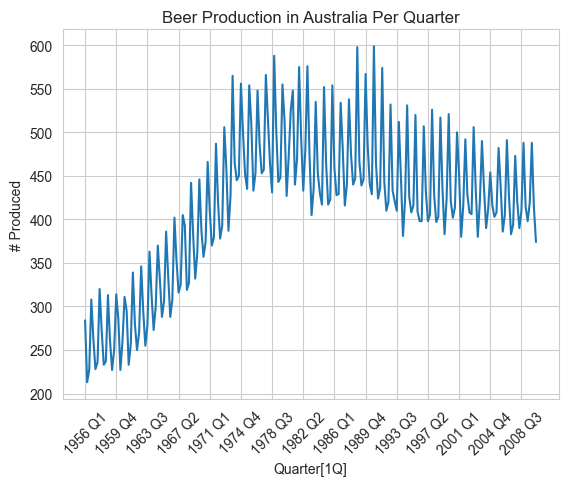

In [14]:
df_beer = df_aus_prod[['Beer']]

plt.plot(df_beer.index, 'Beer', data = df_beer)

plt.xlabel('Quarter[1Q]')
plt.ylabel('# Produced')
plt.title('Beer Production in Australia Per Quarter')

n = 15
ticks = plt.xticks()[0]
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
plt.xticks(ticks[::n], labels[::n], rotation =45)

plt.show()

## Exercise 3

Why is a Box-Cox transformation unhelpful for the `canadian_gas` data?

In [15]:
df_can_gas = pd.read_csv("canadian_gas.csv", parse_dates=['Month'], index_col=['Month'])

df_can_gas["boxcox_Volume"],lmda = boxcox(df_can_gas["Volume"])

C:\Users\nickc\AppData\Local\Temp\ipykernel_39796\2922198550.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_can_gas = pd.read_csv("canadian_gas.csv", parse_dates=['Month'], index_col=['Month'])


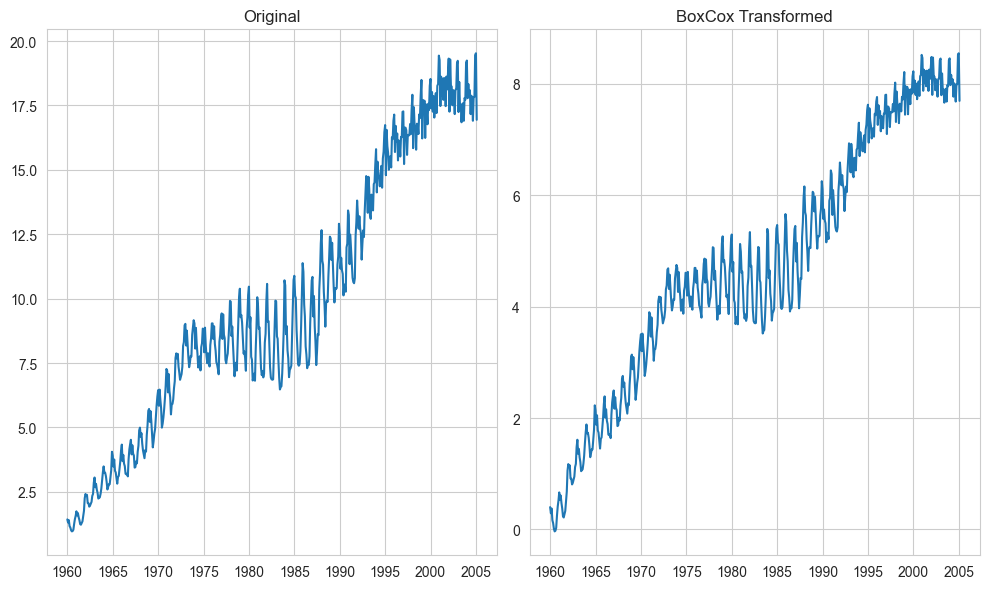

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax[0].plot(df_can_gas.index, df_can_gas['Volume'])
ax[0].set_title('Original')

ax[1].plot(df_can_gas.index, df_can_gas['boxcox_Volume'])
ax[1].set_title('BoxCox Transformed')

plt.tight_layout()
plt.show()

In this case, the boxcox transformation has little to no impact on the variation of the time series which suggests that the original timeseries already had a relativily constant or stable variation.

## Exercise 4

What Box-Cox transformation would you select for your retail data (from Exercise 7 in Section 2.10)?

In [17]:
# read in aus_retail
df_aus_retail = pd.read_csv("aus_retail.csv", parse_dates=["Month"], index_col = ["Month"])

# filter retail
df_retail = df_aus_retail[df_aus_retail['Industry'].str.contains('retail')].iloc[:, 1:]

C:\Users\nickc\AppData\Local\Temp\ipykernel_39796\2839564451.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_aus_retail = pd.read_csv("aus_retail.csv", parse_dates=["Month"], index_col = ["Month"])


In [18]:
# boxcox transformation
df_retail['boxcox_Turnover'], lmbda_retail = boxcox(df_retail['Turnover'])
lmbda_retail

0.02120021594694209

Using the boxcox() function from scipy library, it returned the best estimated lambda for the column `Turnover` to be $\lambda = 0.212$

## Exercise 5

For the following series, find an appropriate Box-Cox transformation in order to stabilise the variance. Tobacco from `aus_production`, Economy class passengers between Melbourne and Sydney from `ansett`, and Pedestrian counts at Southern Cross Station from `pedestrian`.

In [19]:
# read in the data
df_ansett = pd.read_csv("ansett.csv", parse_dates=["Week"], index_col=["Week"])
df_pedestrian = pd.read_csv("pedestrian.csv", parse_dates=["Date_Time"], index_col=["Date_Time"])

C:\Users\nickc\AppData\Local\Temp\ipykernel_39796\2973607094.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ansett = pd.read_csv("ansett.csv", parse_dates=["Week"], index_col=["Week"])


In [20]:
# filter required data
df_tobacco = df_aus_prod[["Tobacco"]]
df_mel_syd = df_ansett[(df_ansett.Class == "Economy") & (df_ansett.Airports == "MEL-SYD")]
df_south_cross = df_pedestrian[df_pedestrian.Sensor == "Southern Cross Station"]

In [21]:
df_tobacco = df_tobacco.loc[df_tobacco.index < '2004 Q3']

In [22]:
df_tobacco['boxcox_Tobacco'], lmd_tobacco = boxcox(df_tobacco["Tobacco"] + 0.000001)
df_mel_syd['boxcox_Passengers'], lmd_passengers = boxcox(df_mel_syd["Passengers"] + 0.000001)
df_south_cross['boxcox_Count'], lmd_count = boxcox(df_south_cross["Count"]+ 0.00001)

C:\Users\nickc\AppData\Local\Temp\ipykernel_39796\1786868687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mel_syd['boxcox_Passengers'], lmd_passengers = boxcox(df_mel_syd["Passengers"] + 0.000001)
C:\Users\nickc\AppData\Local\Temp\ipykernel_39796\1786868687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south_cross['boxcox_Count'], lmd_count = boxcox(df_south_cross["Count"]+ 0.00001)


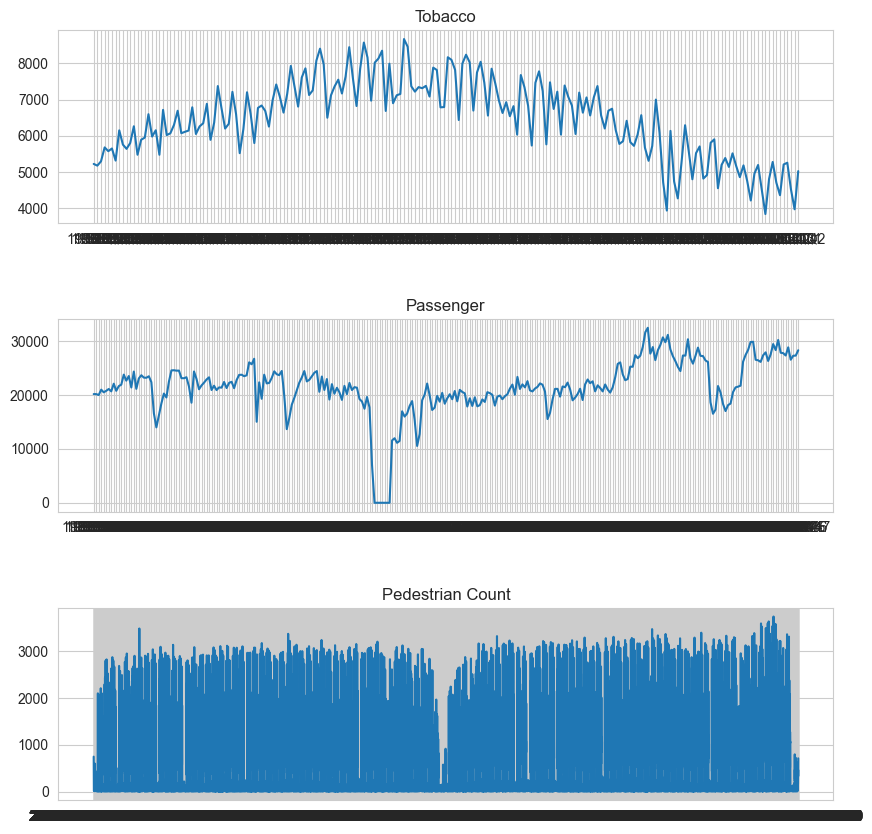

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (10,10))

ax[0].plot(df_tobacco.index, df_tobacco['Tobacco'])
ax[0].set_title("Tobacco")

ax[1].plot(df_mel_syd.index, df_mel_syd['Passengers'])
ax[1].set_title("Passenger")

ax[2].plot(df_south_cross.index, df_south_cross['Count'])
ax[2].set_title("Pedestrian Count")

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

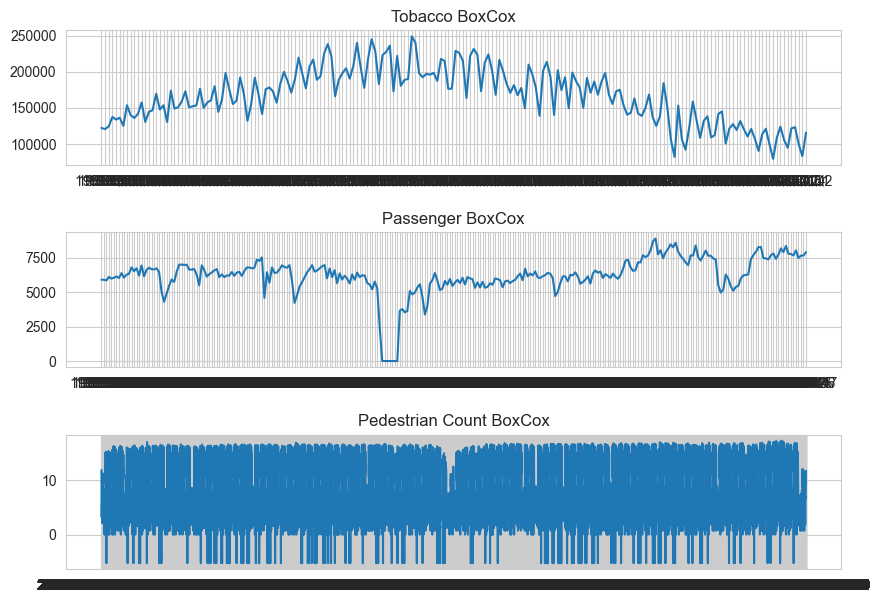

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (10,7))

ax[0].plot(df_tobacco.index, df_tobacco['boxcox_Tobacco'])
ax[0].set_title("Tobacco BoxCox")

ax[1].plot(df_mel_syd.index, df_mel_syd['boxcox_Passengers'])
ax[1].set_title("Passenger BoxCox")

ax[2].plot(df_south_cross.index, df_south_cross['boxcox_Count'])
ax[2].set_title("Pedestrian Count BoxCox")

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

## Exercise 7

Consider the last five years of the Gas data from `aus_production`.

In [ ]:
# select Gas column and filter last 5 years
df_gas = df_aus_prod[['Gas']]
df_gas = df_gas[df_gas.index >= "2005 Q2"]

##### A) Plot the time series. Can you identify seasonal fluctuations and/or a trend-cycle?

In [ ]:
plt.plot(df_gas.index, df_gas['Gas'])
plt.title('Gas Production in the Last 5 Years')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

##### B) Use classical_decomposition with type=multiplicative to calculate the trend-cycle and seasonal indices.

In [ ]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose

decomposition = seasonal_decompose(df_gas['Gas'], period = 4,model='multiplicative')

df_gas["Trend"] = decomposition.trend
df_gas["Seasonal"] = decomposition.seasonal
df_gas["Residual"] = decomposition.resid

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

ax1.plot(decomposition.observed)
ax1.set_title('Observed')

ax2.plot(decomposition.trend)
ax2.set_title('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

In [ ]:
df_gas.head()

##### C) Do the results support the graphical interpretation from part a?

I think it does since it captures the upward trend and the season of the time series. Looking closer at the graphs, every four quarters the pattern repeats.

##### D) Compute and plot the seasonally adjusted data.

In [ ]:
# adjust for seasonal 
seasonally_adjusted_gas = df_gas['Gas'] - df_gas['Seasonal']

# plot adjusted data
plt.figure(figsize=(10,8))
plt.plot(df_gas.index, df_gas["Gas"], label="Original")
plt.plot(df_gas.index, seasonally_adjusted_gas, label="Seasonally Adjusted")

plt.legend()
plt.title("Original and Seasonalyly Removed Data")
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### E) Change one observation to be an outlier (e.g., add 300 to one observation), and recompute the seasonally adjusted data. What is the effect of the outlier?

In [ ]:
df_gas_2 = df_gas.copy()
df_gas_2.at["2007 Q3", "Gas"] = 500 # create outlier at index 2007 Q3

# do the decomp with outlier
decomposition = seasonal_decompose(df_gas_2['Gas'], period = 4,model='multiplicative')

df_gas_2["Trend"] = decomposition.trend
df_gas_2["Seasonal"] = decomposition.seasonal
df_gas_2["Residual"] = decomposition.resid

seasonally_adjusted_gas = df_gas_2['Gas'] - df_gas_2['Seasonal']

# plot adjusted data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

ax1.plot(decomposition.observed)
ax1.set_title('Observed')

ax2.plot(decomposition.trend)
ax2.set_title('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df_gas.index, df_gas["Gas"], label="Original")
plt.plot(df_gas.index, seasonally_adjusted_gas, label="Seasonally Adjusted")

plt.legend()
plt.title("Original and Seasonalyly Removed Data")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Examining the plots above, the augmented outlier has significant effects on the trend and residual components of the timeseries. While, visually had no impact on the seasonality of the data.

##### F) Does it make any difference if the outlier is near the end rather than in the middle of the time series?

Change the outlier to towards the end of the data. Say change 2009 Q4.

In [ ]:
df_gas_3 = df_gas.copy()
df_gas_3.at["2009 Q4", "Gas"] = 500 # create outlier at index 2007 Q3

# do the decomp with outlier
decomposition = seasonal_decompose(df_gas_3['Gas'], period = 4,model='multiplicative')

df_gas_3["Trend"] = decomposition.trend
df_gas_3["Seasonal"] = decomposition.seasonal
df_gas_3["Residual"] = decomposition.resid

seasonally_adjusted_gas = df_gas_3['Gas'] - df_gas_3['Seasonal']

# plot adjusted data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

ax1.plot(decomposition.observed)
ax1.set_title('Observed')

ax2.plot(decomposition.trend)
ax2.set_title('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

The outlier impacted the trend by creating a sharp increase towards the end of the line and augments the pattern of the seasonal component. Although, having the outlier in the middle of data had no visual impact of seasonality. That is not the case of placing the outlier at the end of the data.

## Exercise 8

Recall your retail time series data (from Exercise 7 in Section 2.10). Decompose the series using X-11. Does it reveal any outliers, or unusual features that you had not noticed previously?

In [ ]:
data= df_aus_retail[['Turnover']]
d1= seasonal_decompose(data, period = 4)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

ax1.plot(d1.observed)
ax1.set_title('Observed')

ax2.plot(d1.trend)
ax2.set_title('Trend')

ax3.plot(d1.seasonal)
ax3.set_title('Seasonal')

ax4.plot(d1.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

## Exercise 9

Figures 3.19 and 3.20 show the result of decomposing the number of persons in the civilian labour force in Australia each month from February 1978 to August 1995.

##### Write about 3–5 sentences describing the results of the decomposition. Pay particular attention to the scales of the graphs in making your interpretation.

In the years 1978 to 1995, we observe that the civilian labor force in Australia has overall upward trend. With the seaonality within that year of losing/gaining of 75-100 workers which suggests that the labor force in Australia is relatively stable. Moreover, the 1991 recession does appear in the remainder component of the decomposition which is interesting because it does not affect the overall trend and seasonal. Thus, this decomposition method considered it as noise since it was a blackswan event enclosed this data.

##### Is the recession of 1991/1992 visible in the estimated components?

The recession does not appear to significantly impact the overall trend and seasonal estimated components in the plot. However, it can observed in the remainder component indicating the unusual deviation from the expected pattern in the data.